# MNIST Problem
## Problem description
The MNIST is a multiclassification problem. The dataset consist of handwritten digits (0 through 9), of size 28 x 28 and the algorithms has to classify which digit is.

## Importing the data set
First of all, let's import the MNIST data set, luckily it's precharged in the Keras library

In [17]:
from keras.datasets import mnist

(img_train, labels_train), (img_test, labels_test) = mnist.load_data()

<class 'numpy.uint8'>


To make sure everything is OK, I'll plot some digits from the MNIST data set

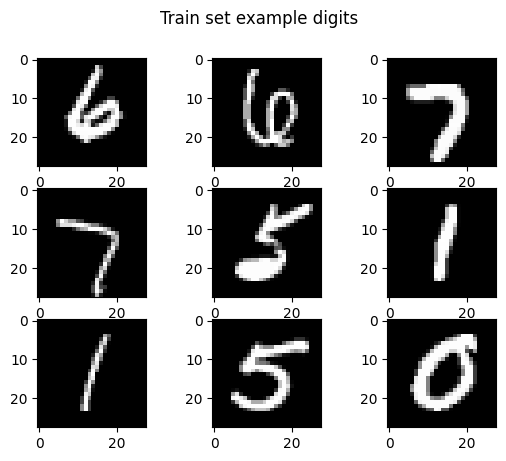

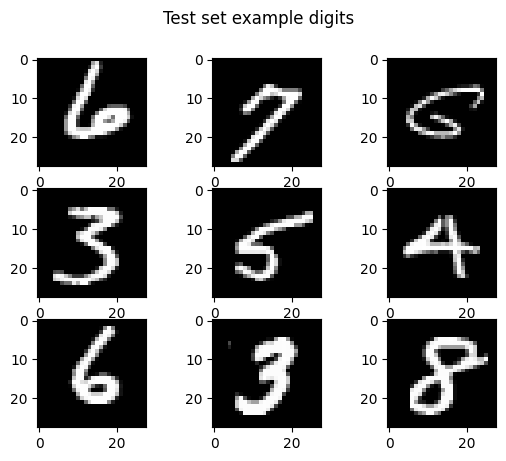

In [3]:
import matplotlib.pyplot as plt
import numpy as np

last_pic_train = np.shape(img_train)[0]
last_pic_test = np.shape(img_test)[0]

A=[]
[A.append(np.random.randint(0,last_pic_train)) for x in range(9)]

B=[]
[B.append(np.random.randint(0,last_pic_test)) for x in range(9)]

fig, axs = plt.subplots(3,3)
fig.suptitle('Train set example digits')
axs[0,0].imshow(img_train[A[0]],cmap='gray')
axs[0,1].imshow(img_train[A[1]],cmap='gray')
axs[0,2].imshow(img_train[A[2]],cmap='gray')

axs[1,0].imshow(img_train[A[3]],cmap='gray')
axs[1,1].imshow(img_train[A[4]],cmap='gray')
axs[1,2].imshow(img_train[A[5]],cmap='gray')

axs[2,0].imshow(img_train[A[6]],cmap='gray')
axs[2,1].imshow(img_train[A[7]],cmap='gray')
axs[2,2].imshow(img_train[A[8]],cmap='gray')

fig, axs = plt.subplots(3,3)
fig.suptitle('Test set example digits')
axs[0,0].imshow(img_test[B[0]],cmap='gray')
axs[0,1].imshow(img_test[B[1]],cmap='gray')
axs[0,2].imshow(img_test[B[2]],cmap='gray')

axs[1,0].imshow(img_test[B[3]],cmap='gray')
axs[1,1].imshow(img_test[B[4]],cmap='gray')
axs[1,2].imshow(img_test[B[5]],cmap='gray')

axs[2,0].imshow(img_test[B[6]],cmap='gray')
axs[2,1].imshow(img_test[B[7]],cmap='gray')
axs[2,2].imshow(img_test[B[8]],cmap='gray')

plt.show()


As you can see, this dataset has a convenient property: all the images have the same size, which will make the preprocessing part easier.

## MNIST Binary classifier (5-detector)

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #calls the StandardScaler class
scaler.fit(img_train[0]) #calculates the mean and the standard deviation of trainX
trainX = scaler.transform(img_train) # standardizes the trainX variable
testX = scaler.transform(labels_train) # standardizes the testX variable

# sgd_clf = SGDClassifier(loss="log",penalty="l2")
# sgd_clf.fit(img_train,labels_train)
# sgd_clf.predict()

ValueError: Found array with dim 3. StandardScaler expected <= 2.

So the next step is to create the neural network this is done by the following lines of code

In [7]:
from keras import models 
from keras import layers

network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

- The first line: calls the class Sequential, it creates the Neural Network which at this point is empty.

- The second line: This method adds 1 hidden layer which is densely connected. This means that all the nodes from the hidden layer i are connected to all the nodes of hidden layer i+1. The amount of nodes added in this second layer (or first hidden layer) are 512. The activation function is the ReLU. The input layer consist of 784 nodes.

- The third line: This method does the same thing as the previous line, but the nodes of the layer is 10 and the activation function is the softmax.  

To sum up:
<ol>
  <li>input layer: 784 nodes </li>
  <li>hidden layer 1: 512 nodes (ReLU) </li>
  <li>output layer: 10 nodes (softmax) </li>
</ol>

## Compilation
There are three features defined in this section:
<ol>
  <li>optimizer </li>
  <li>loss function</li>
  <li>metrics to evaluate the performance of the model</li>
</ol>


In [ ]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
    )

In [ ]:
train_images = img_train.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

In [ ]:
test_images = img_test.reshape((10000, 28 * 28))
test_images = img_test.astype('float32') / 225

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_label)
y_test = to_categorical(y_test)

In [ ]:
# Fit the model to its training data
#         Epochs = 5
#         Batch Size = 128
network.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
# Calculate Test loss and Test Accuracy
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:
# Print Test loss and Test Accuracy
print(f"Test Loss: {test_loss}\nTest Accuracy : {test_acc * 100} %")